# Lloyd Prior Visualisation
In this notebook, I'm visualising samples from the prior defined in the paper by Lloyd et al ([2012](https://papers.nips.cc/paper/2012/hash/df6c9756b2334cc5008c115486124bfe-Abstract.html))


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import default_rng
rng = default_rng(seed=1234)

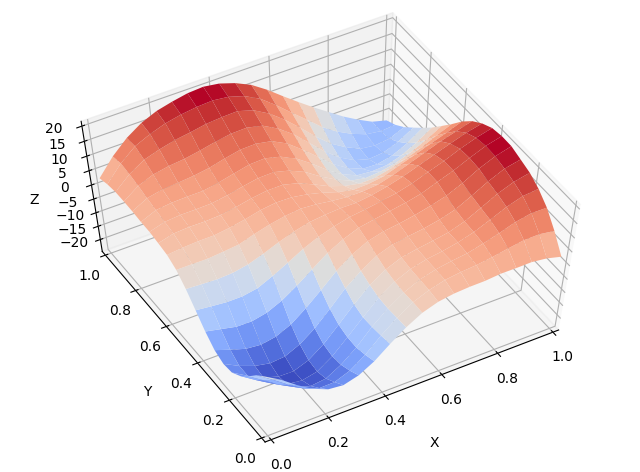

In [3]:
def k_hat(xi1, xi2, lengthscale, signal_variance):
    return np.square(signal_variance) * np.exp(-0.5 * np.square(np.linalg.norm(xi1 - xi2) / lengthscale))

def k(xi1, xi2, lengthscale, signal_variance):
    flipped_xi2 = np.flip(xi2, axis=-1)
    return 0.5*(k_hat(xi1, xi2, lengthscale, signal_variance) + k_hat(xi1, flipped_xi2, lengthscale, signal_variance))

lengthscale = 0.2
signal_variance = 10
noise_variance = 0.01
netsize = 20

nodes = list(range(netsize))

U = np.linspace(0,1,netsize)
all_pairs = np.array([[a,b] for a in U for b in U])

covariance_matrix = np.empty((all_pairs.shape[0], all_pairs.shape[0]))
for id1, pair1 in enumerate(all_pairs):
    for id2, pair2 in enumerate(all_pairs):
        covariance_matrix[id1, id2] = k(pair1, pair2, lengthscale, signal_variance)
covariance_matrix += np.identity(covariance_matrix.shape[0]) * noise_variance

yy = rng.multivariate_normal(np.zeros(covariance_matrix.shape[0]), covariance_matrix, 2)

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(U, U)
ax.plot_surface(X, Y, yy[0].reshape(netsize,netsize), cmap=plt.cm.coolwarm, antialiased=True)

ax.set_ylim(1,0)
ax.set_xlim(1,0)

ax.set_xlabel("\nX", linespacing=3.2)
ax.set_ylabel("\nY", linespacing=3.2)
ax.set_zlabel("\nZ", linespacing=3.2)

ax.view_init(60, 60)

plt.show()